In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm

In [2]:
os.getcwd()

'C:\\Users\\GC\\AA\\회귀분석'

In [9]:
boston=pd.read_csv("part2_data/Boston_house.csv")

In [10]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [11]:
boston_data=boston.drop(['Target'],axis=1)

In [12]:
boston_data.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0


In [13]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

In [19]:
target=boston[['Target']]
rm=boston[['RM']]
crim=boston[['CRIM']]
lstat=boston[['LSTAT']]

In [20]:
crim

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905
...,...
501,0.06263
502,0.04527
503,0.06076
504,0.10959


#### 1. 상수항 추가하기
- 베타0 + 베타1

In [21]:
# crim 변수에 상수항 추가하기
crim1=sm.add_constant(crim, has_constant="add")
crim1

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [24]:
model1= sm.OLS(target, crim1)
fitted_model1=model1.fit()

In [26]:
# 회귀 모델 결과 만들어주는 것
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.17e-19
Time:                        09:55:34   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# 회귀 계수만 출력하기
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

#### y hat 구하기 
- 1번째 방법:

In [32]:
np.dot(crim1,fitted_model1.params)


array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [33]:
pred1= fitted_model1.predict(crim1)

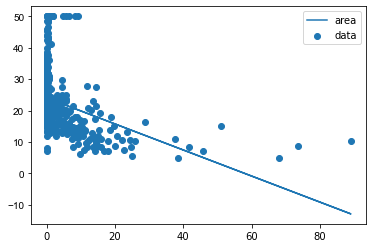

In [42]:
import matplotlib.pyplot as plt
plt.yticks(fontname='Arial')
plt.scatter(crim, target, label='data')
plt.plot(crim,pred1,label='area')
plt.legend()
plt.show()

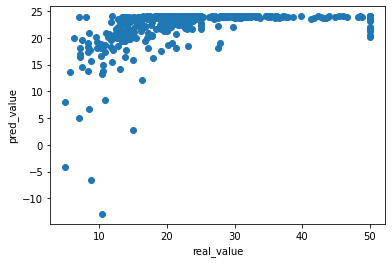

In [43]:
plt.scatter(target, pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

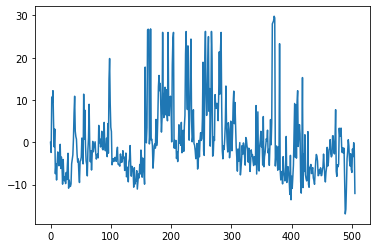

In [44]:
fitted_model1.resid.plot()
plt.show()

In [45]:
np.sum(fitted_model1.resid)

-3.353761712787673e-12

In [73]:
rm=boston[["RM"]]
lstat=boston[["LSTAT"]]

In [55]:
rm1=sm.add_constant(rm,has_constant="add")
lstat1=sm.add_constant(lstat, has_constant="add")

In [56]:
model2=sm.OLS(target,rm1)
fitted_model2=model2.fit()

model3=sm.OLS(target,lstat1)
fitted_model3= model3.fit()

print(fitted_model2.summary())
print(fitted_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.49e-74
Time:                        11:51:52   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [60]:
# RM 회귀계수 출력
fitted_model2.params

const   -34.670621
RM        9.102109
dtype: float64

In [59]:
# LSTAT 회귀계수
fitted_model3.params

const    34.553841
LSTAT    -0.950049
dtype: float64

In [67]:
# RM yhat 값 
pred2=fitted_model2.predict(rm1)

In [68]:
# LSTAT yhat 값
pred3 = fitted_model3.predict(lstat1)

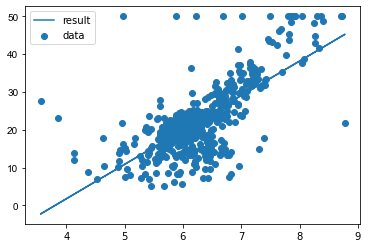

In [70]:
# RM 직선 시각화
plt.yticks(fontname="Arial")
plt.scatter(rm, target, label='data')
plt.plot(rm, pred2, label='result')
plt.legend()
plt.show()

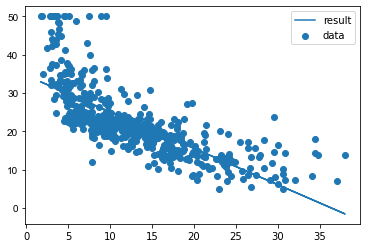

In [71]:
# LSTAT 직선 시각화
plt.yticks(fontname="Arial")
plt.scatter(lstat, target, label='data')
plt.plot(lstat, pred3, label='result')
plt.legend()
plt.show()

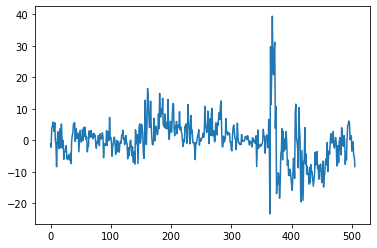

In [74]:
fitted_model2.resid.plot()
plt.show()

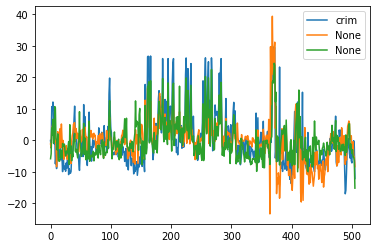

In [78]:
fitted_model1.resid.plot(label='crim')
fitted_model2.resid.plot()
fitted_model3.resid.plot()
plt.legend()
plt.show()